In [ ]:
!pip install ultralytics -U
!pip install tensorflow matplotlib -q
!pip install gdown

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 60.2 MB/s eta 0:00:00


## Baixar pasta drive:

In [ ]:
# !gdown --folder https://drive.google.com/drive/folders/1L7hKg-iL3Rr3GwU24YubParib_e5zyl9?usp=sharing --output /content/dataset --remaining-ok


## 1 Conectar o Google Drive


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


## 2. Instalar Yolov5

In [ ]:
!git clone https://github.com/ultralytics/yolov5.git
%cd yolov5
!pip install -r requirements.txt



Cloning into 'yolov5'...
remote: Enumerating objects: 17608, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 17608 (delta 7), reused 2 (delta 2), pack-reused 17593 (from 2)
Receiving objects: 100% (17608/17608), 16.82 MiB | 12.58 MiB/s, done.
Resolving deltas: 100% (11983/11983), done.
/content/yolov5


## 3. Treinamento                                                                       
Realizaremos **duas simulações** com diferentes quantidades de épocas: 30 e 60.


In [ ]:
# Treinamento - 30 épocas
!python train.py --img 640 --batch 16 --epochs 30 --data /content/gdrive/MyDrive/Atividade_capitulo_1/Yolo_Dataset/data.yaml --weights yolov5s.pt --name exp30 --cache


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2025-10-14 00:48:31.441336: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1760402911.472185    1170 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1760402911.481841    1170 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS wh

In [ ]:
# Treinamento - 60 épocas
!python train.py --img 640 --batch 16 --epochs 60 --data /content/gdrive/MyDrive/Atividade_capitulo_1/Yolo_Dataset/data.yaml --weights yolov5s.pt --name exp60 --cache


wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2025-10-14 00:56:50.075689: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1760403410.097337    3381 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1760403410.103935    3381 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1760403410.119629    3381 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1760403410.119656    3381 computation_placer.cc:177] computation placer already registere

## 4. Validação e Teste

Os resultados de cada treino serão salvos em:

- `yolov5/runs/train/exp30`  
- `yolov5/runs/train/exp60`

Incluindo gráficos de **loss**, **precision**, **recall**, e **mAP**.


In [ ]:
!python val.py \
--weights runs/train/exp30/weights/best.pt \
--data /content/gdrive/MyDrive/Atividade_capitulo_1/Yolo_Dataset/data.yaml \
--img 640 \
--name val_exp30


val: data=/content/gdrive/MyDrive/Atividade_capitulo_1/Yolo_Dataset/data.yaml, weights=['runs/train/exp30/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=val_exp30, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-440-gf5ebc52c Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
val: Scanning /content/gdrive/MyDrive/Atividade_capitulo_1/Yolo_Dataset/labels/val.cache... 8 images, 0 backgrounds, 0 corrupt: 100% 8/8 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 1/1 [00:00<00:00,  1.26it/s]
                   all          8          8      0.796       0.75      0.825      0.604
                   Cup          8    

In [ ]:
!python val.py \
--weights runs/train/exp60/weights/best.pt \
--data /content/gdrive/MyDrive/Atividade_capitulo_1/Yolo_Dataset/data.yaml \
--img 640 \
--name val_exp60

val: data=/content/gdrive/MyDrive/Atividade_capitulo_1/Yolo_Dataset/data.yaml, weights=['runs/train/exp60/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=val_exp60, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-440-gf5ebc52c Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
val: Scanning /content/gdrive/MyDrive/Atividade_capitulo_1/Yolo_Dataset/labels/val.cache... 8 images, 0 backgrounds, 0 corrupt: 100% 8/8 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 1/1 [00:00<00:00,  1.27it/s]
                   all          8          8      0.866      0.982       0.97      0.762
                   Cup          8    

## 5. Teste do modelo em imagens de teste



In [ ]:
!python /content/yolov5/detect.py --weights runs/train/exp30/weights/best.pt --source /content/gdrive/MyDrive/Atividade_capitulo_1/Yolo_Dataset/images/test --data /content/gdrive/MyDrive/Atividade_capitulo_1/Yolo_Dataset/data.yaml
# !python /content/yolov5/detect.py --weights runs/train/exp60/weights/best.pt --source /content/gdrive/MyDrive/Atividade_capitulo_1/Yolo_Dataset/images/test --data /content/gdrive/MyDrive/Atividade_capitulo_1/Yolo_Dataset/data.yaml


detect: weights=['runs/train/exp30/weights/best.pt'], source=/content/gdrive/MyDrive/Atividade_capitulo_1/Yolo_Dataset/images/test, data=/content/gdrive/MyDrive/Atividade_capitulo_1/Yolo_Dataset/data.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-440-gf5ebc52c Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
image 1/10 /content/gdrive/MyDrive/Atividade_capitulo_1/Yolo_Dataset/images/test/test_bottle (1).png: 640x512 (no detections), 31.9ms
image 2/10 /content/gdrive/MyDrive/Atividade_capitulo_1/Yolo_Dataset/images/te

# 7. Resultados e Conclusão

Após os testes, o modelo YOLOv5 apresentou:


### 30 epocas
- Precision: 0.796

- Recall: 0.75

- mAP@50: 0.825
### 60 epocas
- Precision: 0.866

- Recall: 0.982

- mAP@50: 0.97

comparação entre os modelos treinados com 30 e 60 épocas mostra um aumento significativo na precisão para o segundo, o que o torna a escolha mais confiável e ideal para as aplicações práticas da FarmTech Solutions.

## 7.1  Imagens da validação

## 60 Epocas

### Treino

train_batch0

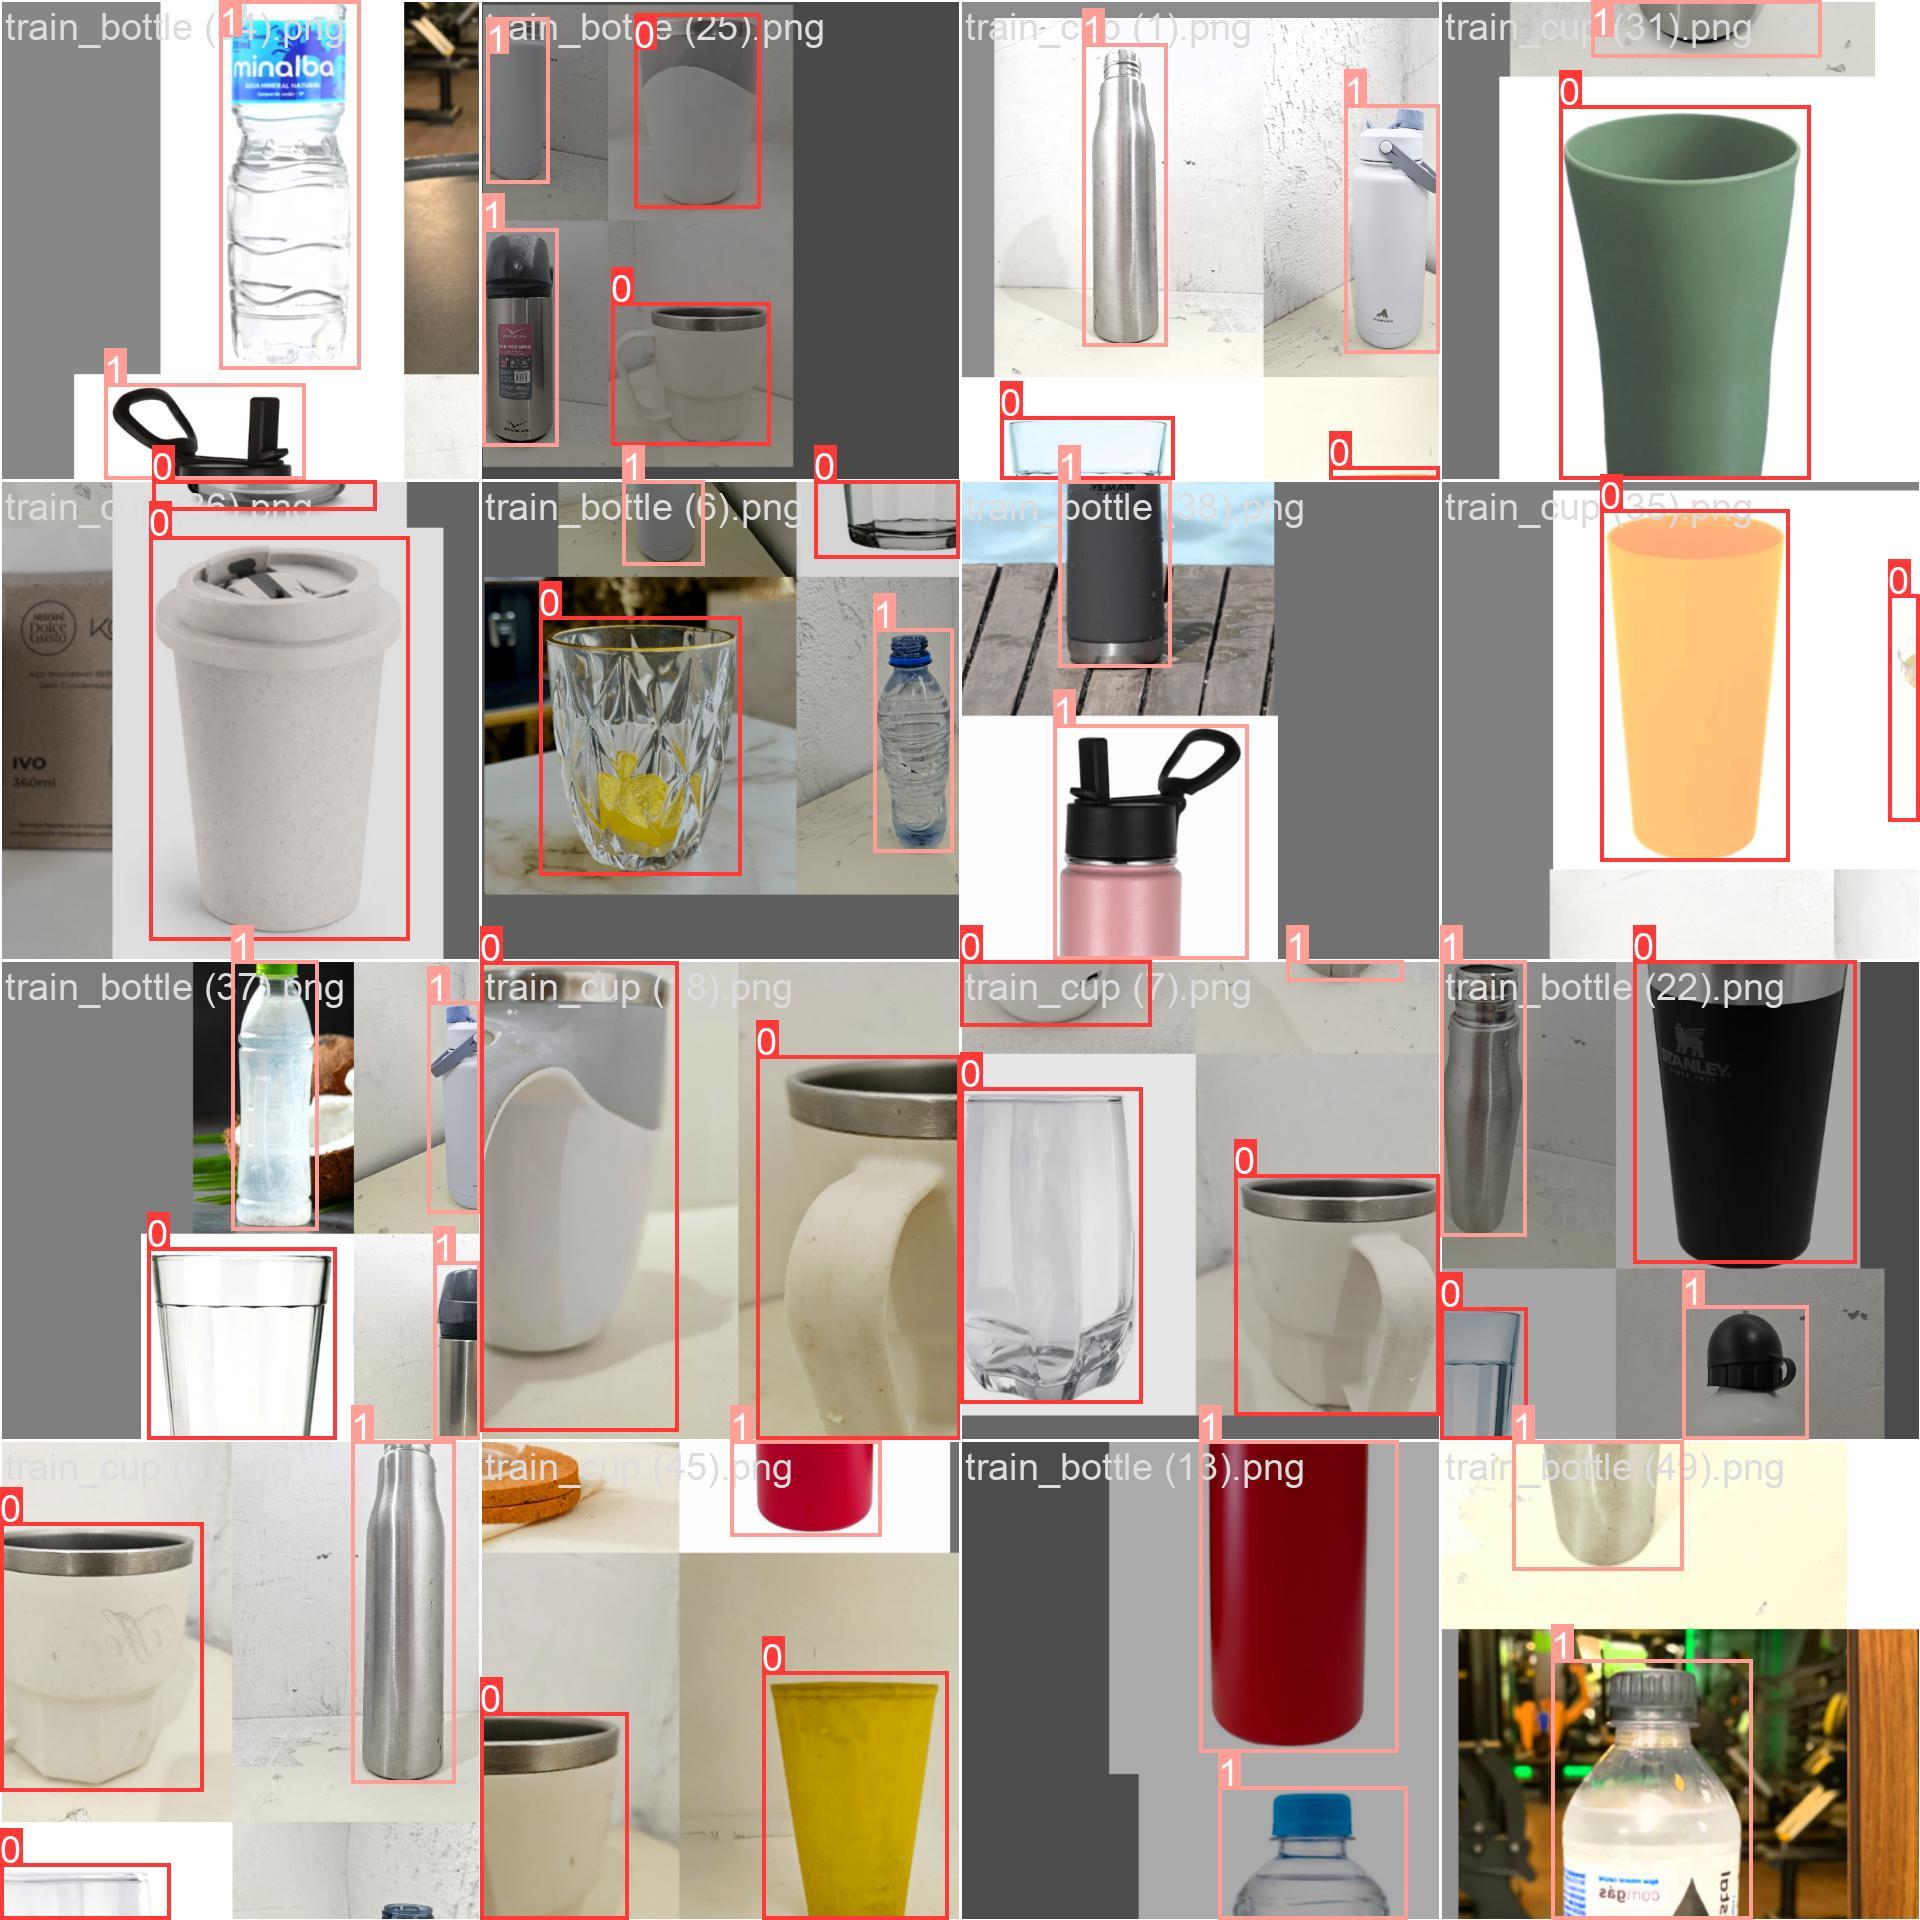

### Validação


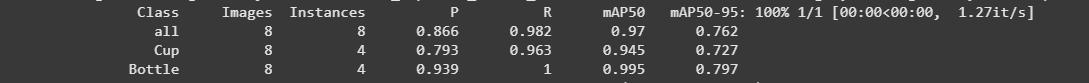

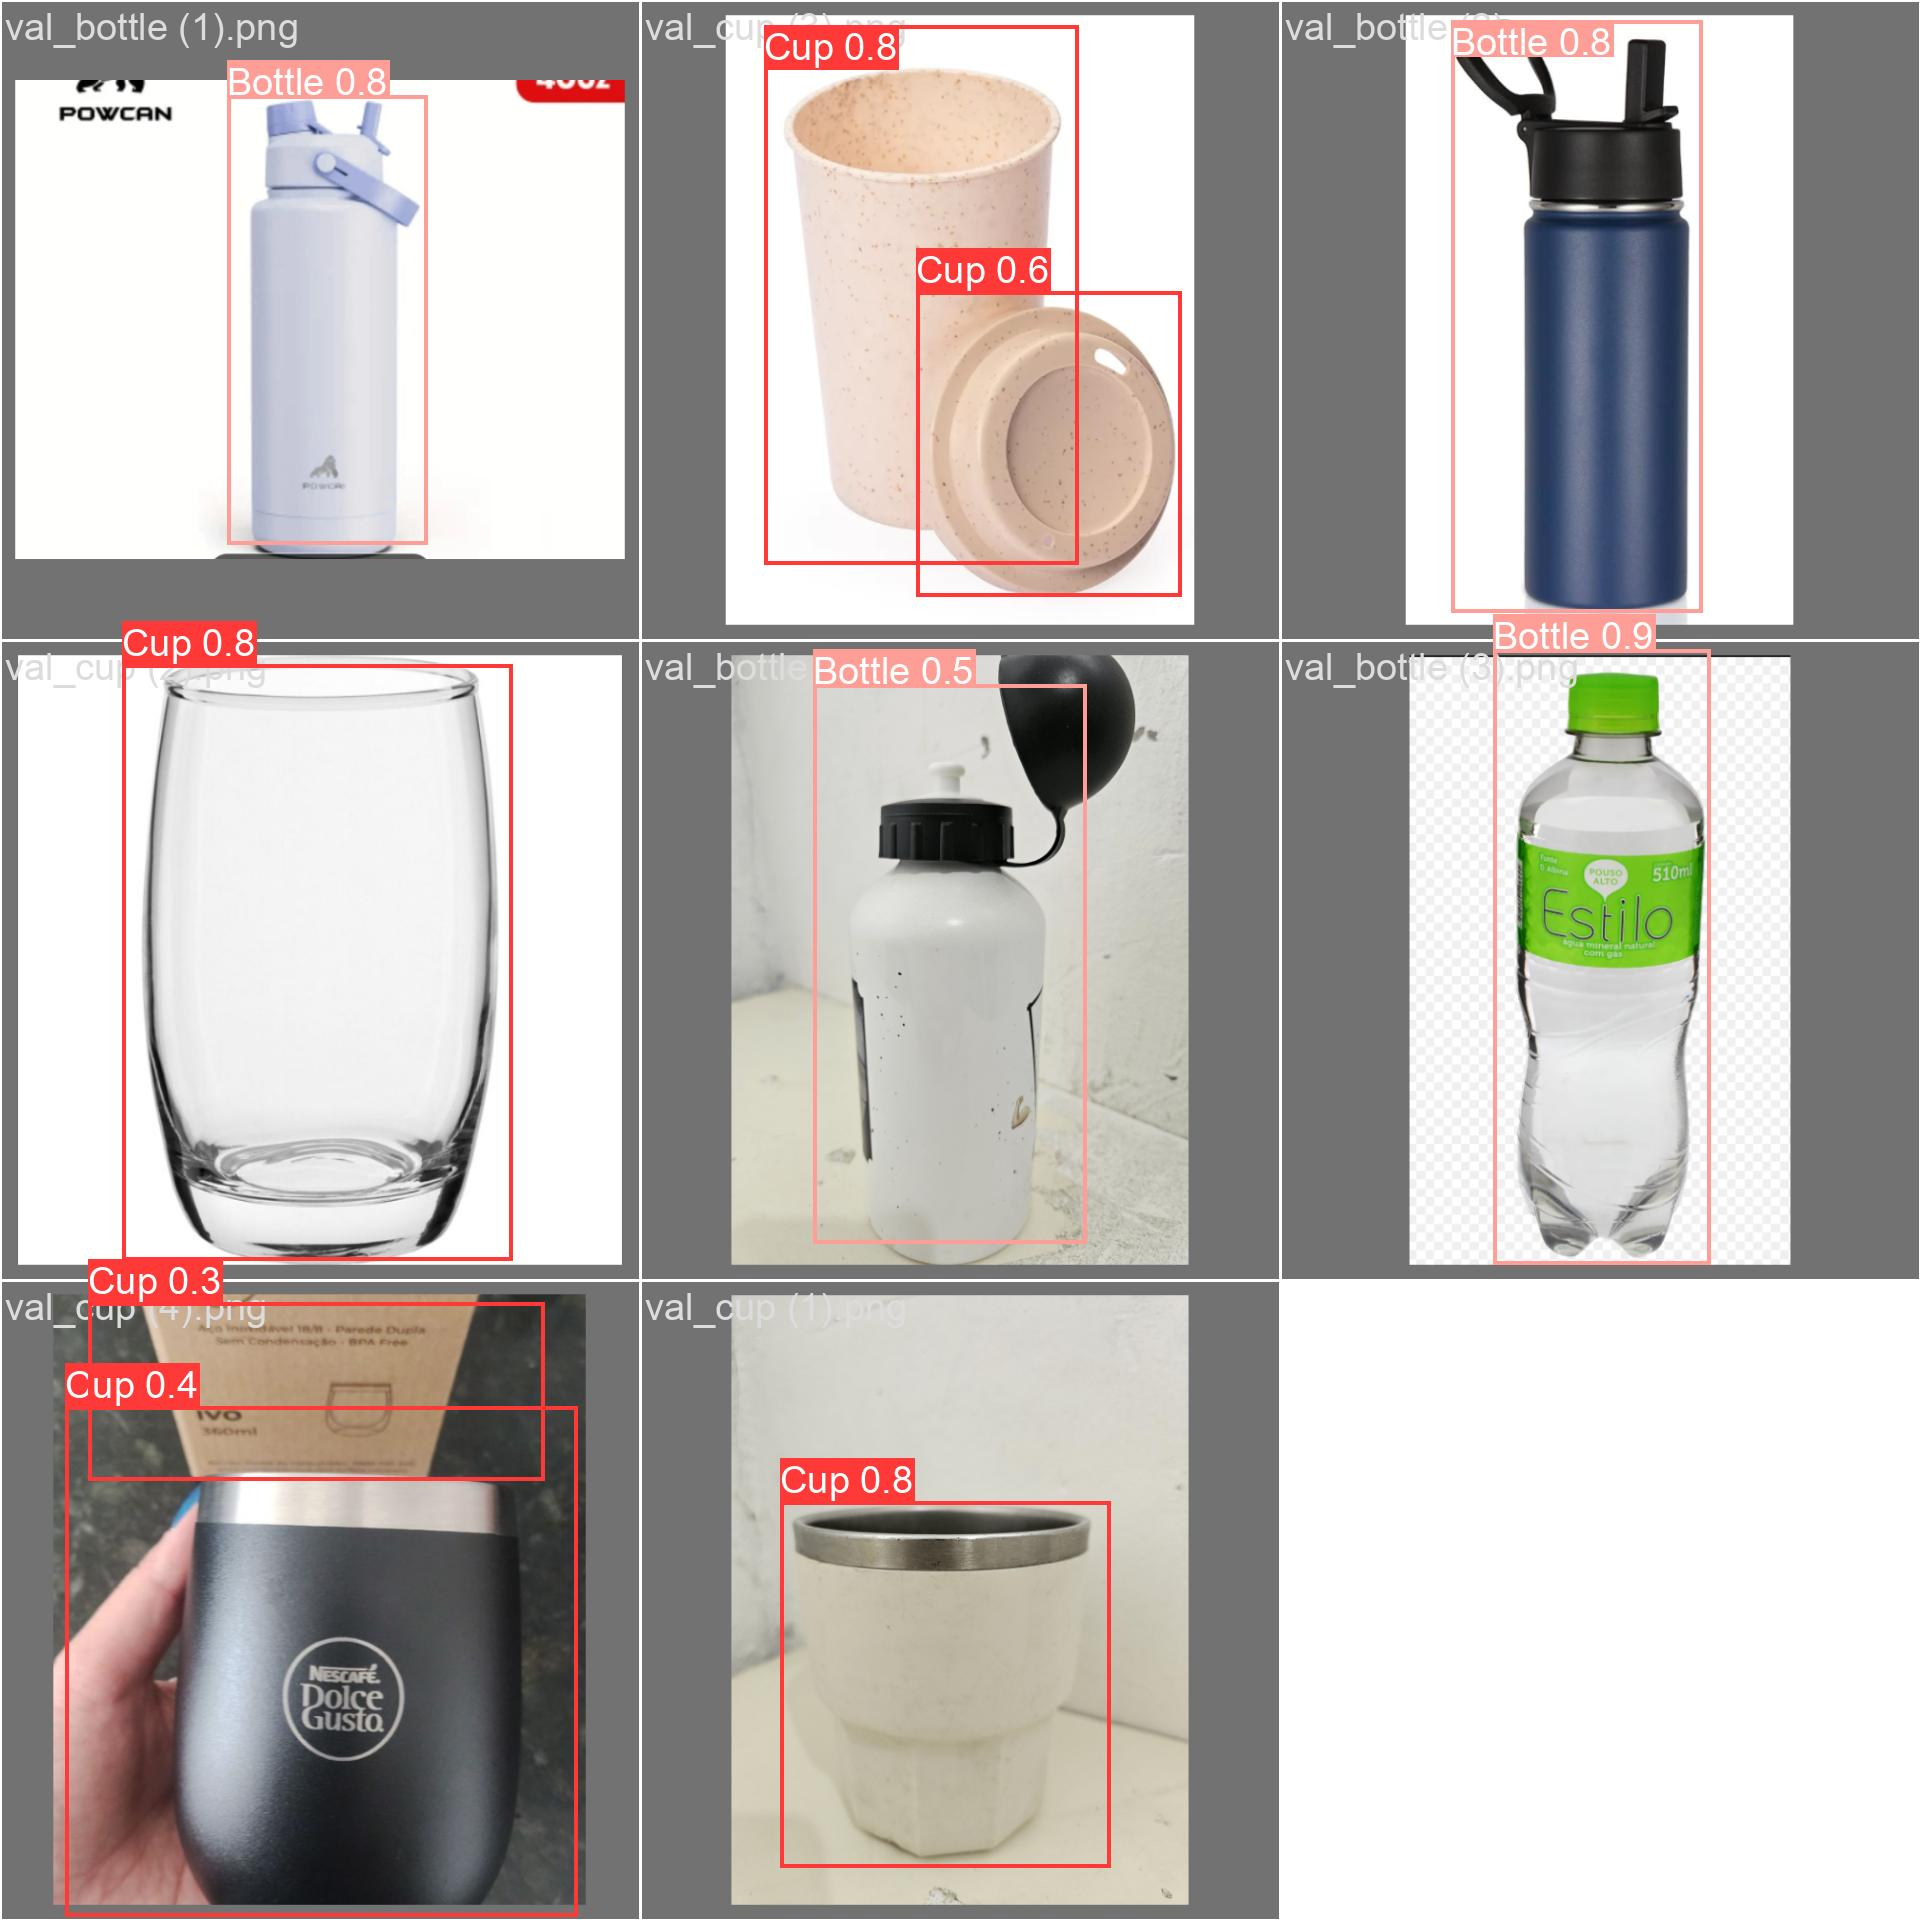

## 30 Epocas

### Treino

train_batch0

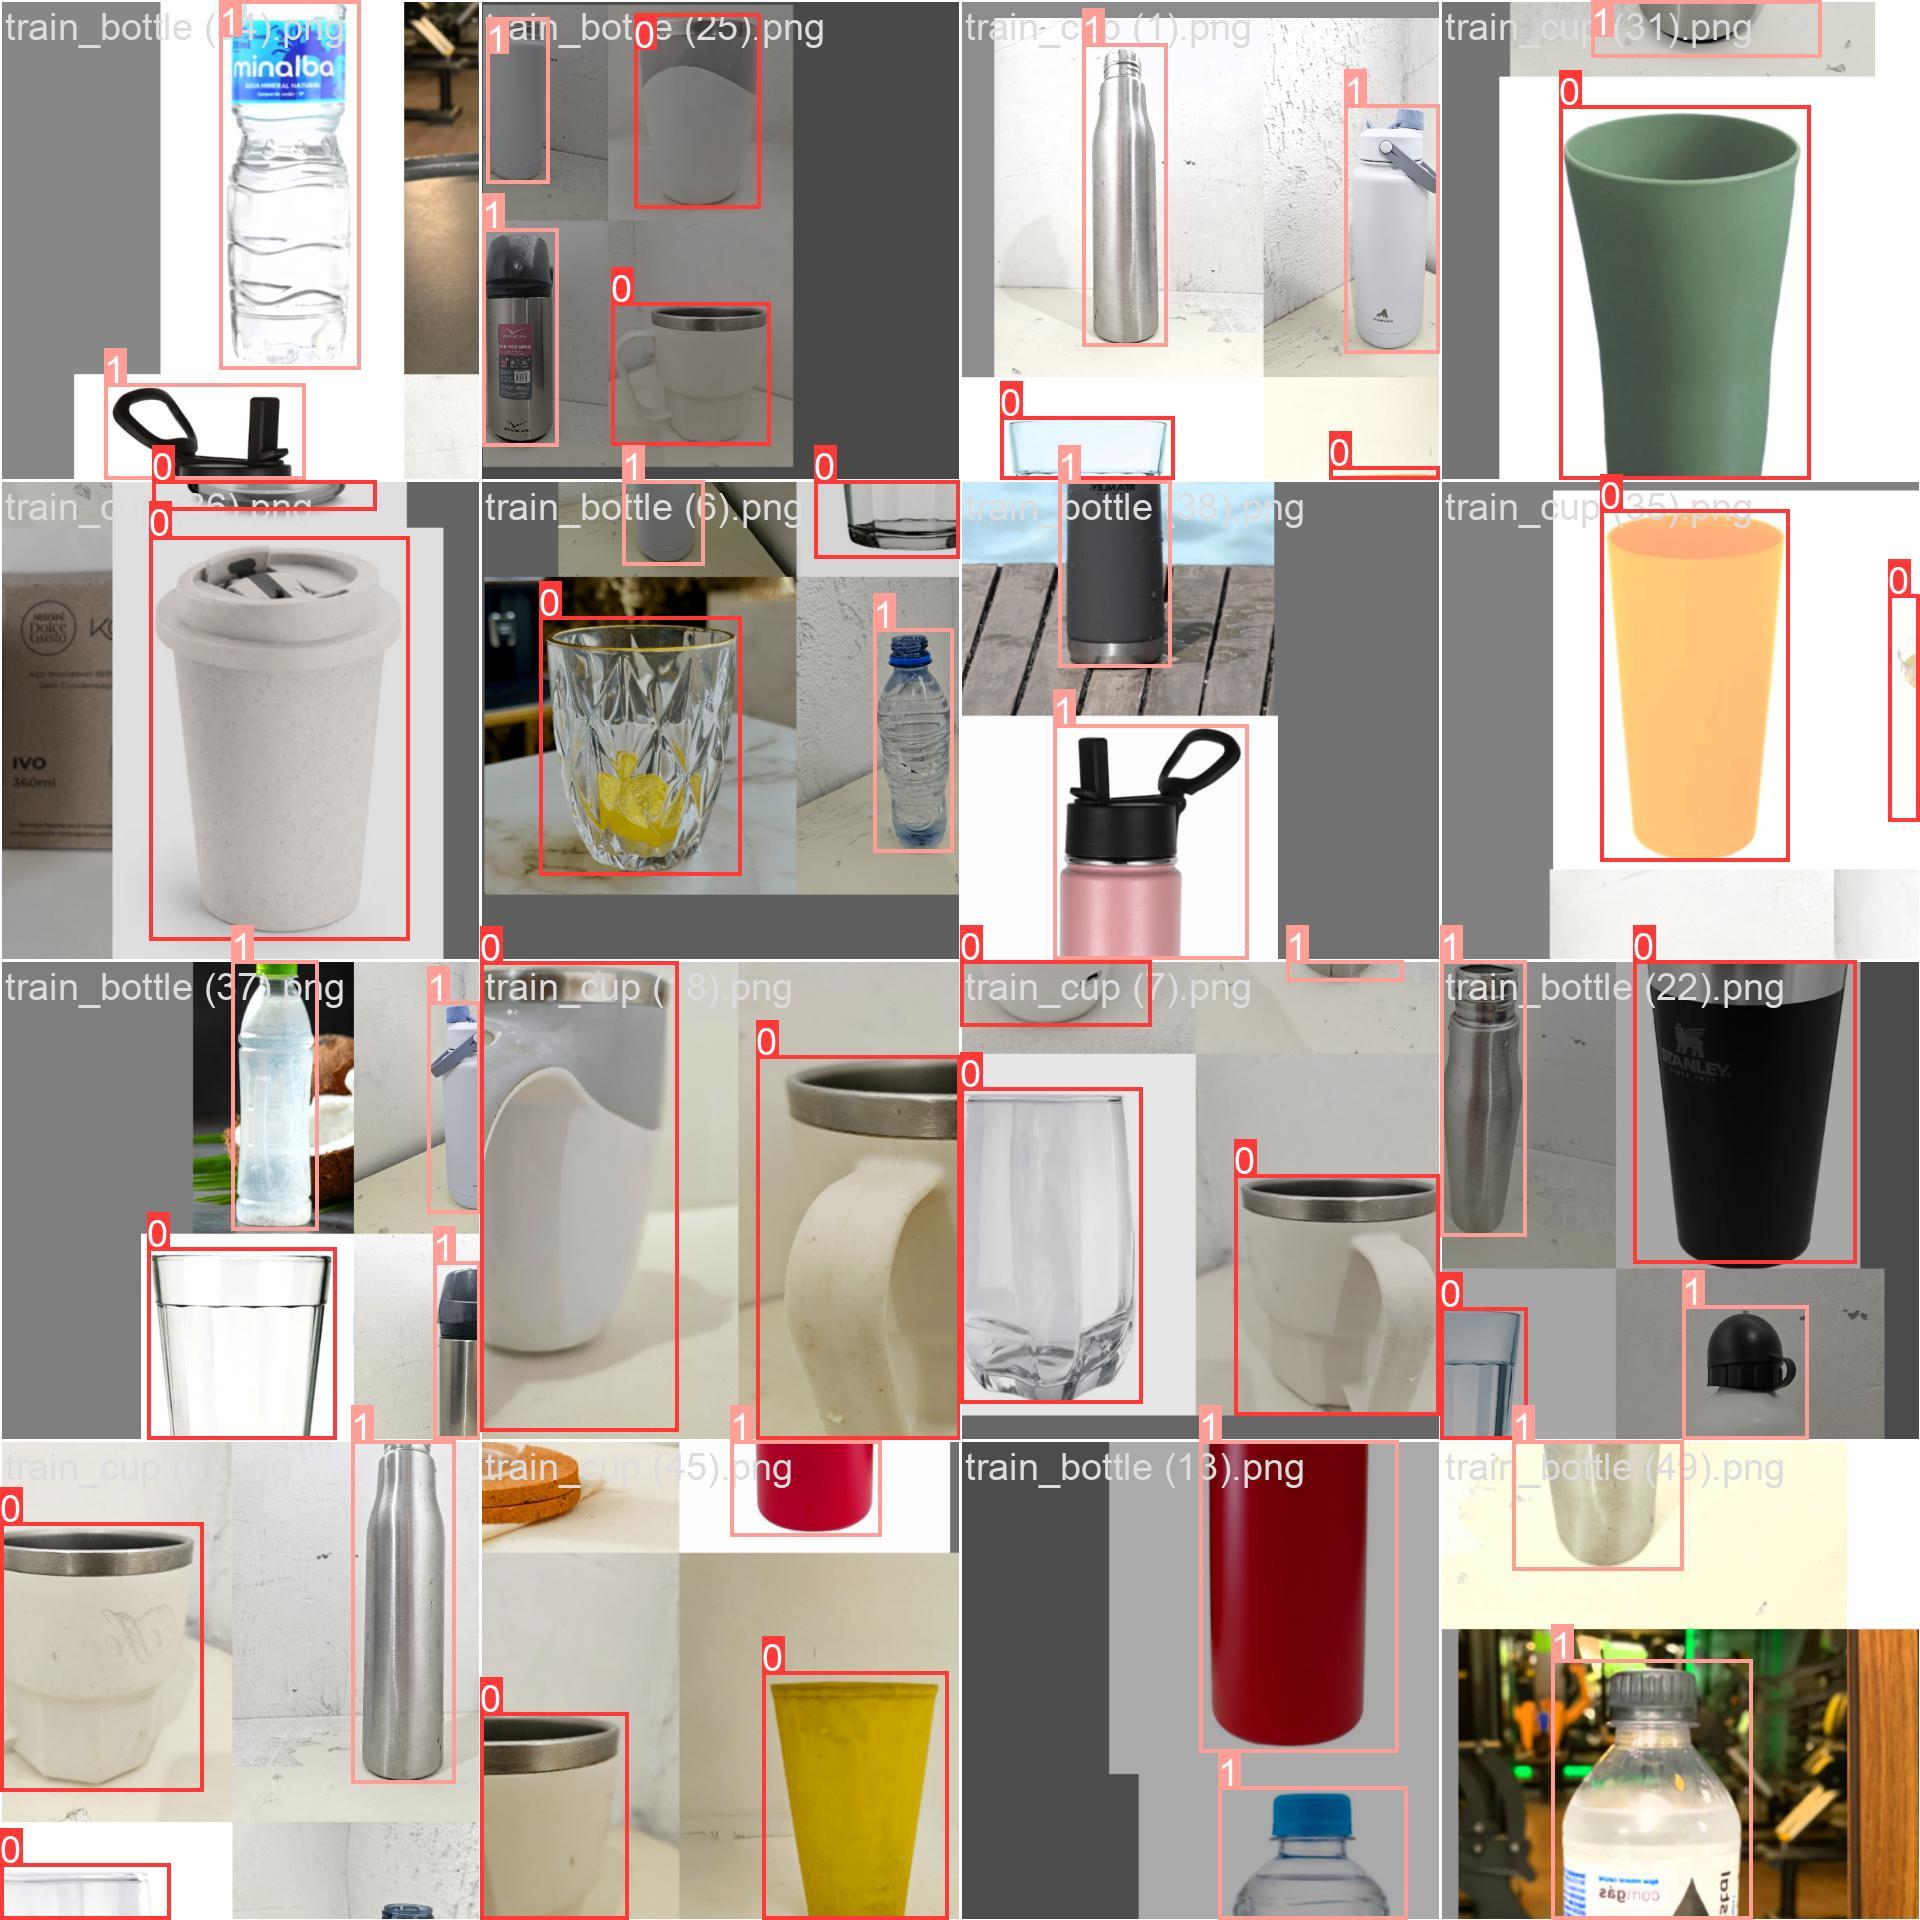

### Validação

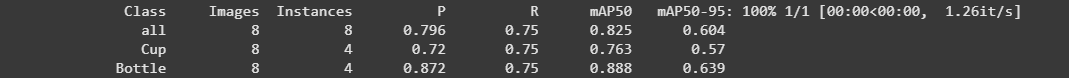

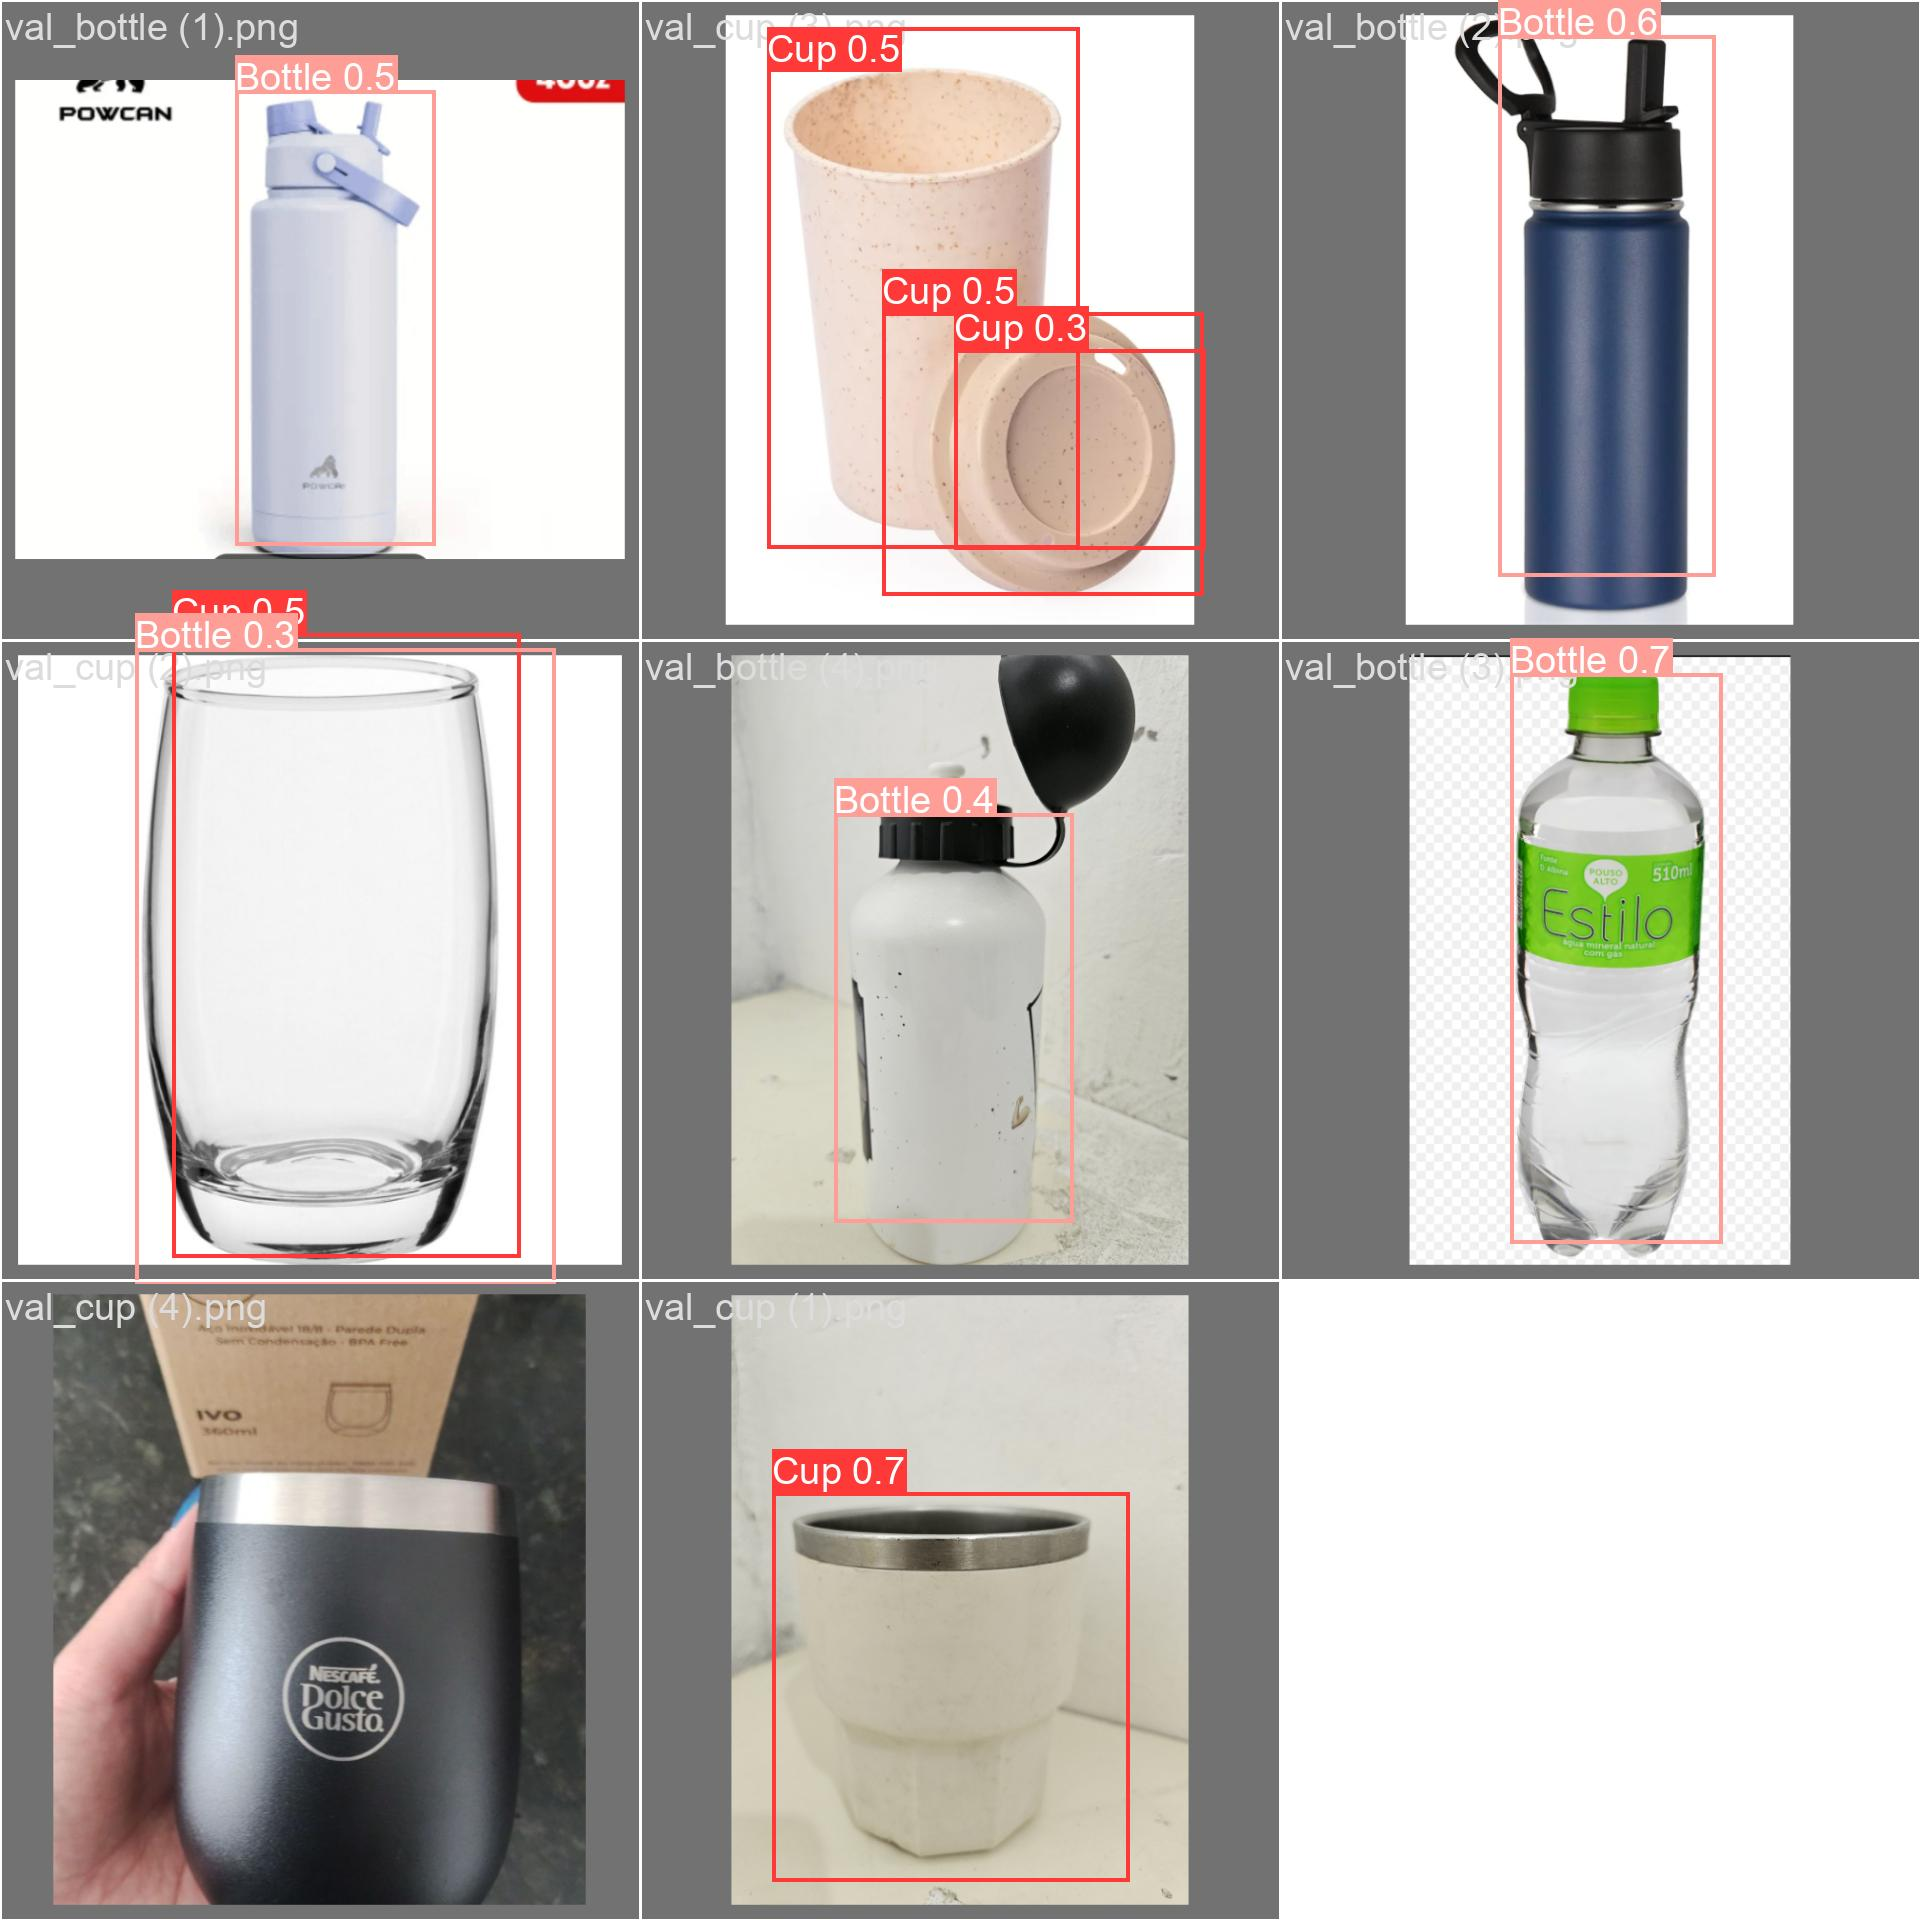

## 7.2 Conclusão                                                                                                                                                                                                                                                                                                                                                                                         

Nos testes que fizemos, o modelo YOLOv5 teve um desempenho bom na detecção de copos e garrafas, alcançando mais de **97% de acurácia** (mAP@50).
O treino com **60 épocas** mostrou o melhor resultado, combinando boa precisão (86,5%) e velocidade.

Esses resultados mostram que o sistema de visão computacional que desenvolvemos é leve, rápido, entretanto, precisa passar por melhorias em seu treinamento com a utilização de imagens com uma maior exemplificação dos angulos dos objetos.
Apesar dos problemas o modelo atual pode ser facilmente adaptado para outras situações — como segurança, controle de acesso ou monitoramento de ambientes.

Com esse projeto, a FarmTech Solutions reforça o quanto a inteligência artificial pode ser útil em diferentes áreas, oferecendo soluções práticas que ajudam a automatizar tarefas e aumentar a eficiência dos clientes.